In [59]:
# import libraries 
import numpy as np  # library()
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression  # 
% matplotlib inline 


# monte carlo sim with n=50 and J=10000
intercept_50=[]
coef_50=[]
Rsquared_50=[]
for i in np.arange(10000):
    epsilon=np.random.normal(0,80,50).reshape(50,-1)
    t= np.arange(1,51).reshape(50,-1)
    y=2+2*t+epsilon
    ols= LinearRegression()
    ols.fit(t,y)
    intercept_50.append(ols.intercept_[0])   # [0] because the intercept is returned in list form
    coef_50.append(ols.coef_.tolist()[0][0]) # [0][0] because coef is in tupple
    Rsquared_50.append(ols.score(t,y))
    
# MCsim: n=100
intercept_100=[]
coef_100=[]
Rsquared_100=[]
for i in np.arange(10000):
    epsilon=np.random.normal(0,80,100).reshape(100,-1)
    t= np.arange(1,101).reshape(100,-1)
    y=2+2*t+epsilon
    ols= LinearRegression()
    ols.fit(t,y)
    intercept_100.append(ols.intercept_[0])
    coef_100.append(ols.coef_.tolist()[0][0])
    Rsquared_100.append(ols.score(t,y))

# MC sim: n=200
intercept_200=[]
coef_200=[]
Rsquared_200=[]
for i in np.arange(10000):
    epsilon=np.random.normal(0,80,200).reshape(200,-1)
    t= np.arange(1,201).reshape(200,-1)
    y=2+2*t+epsilon
    ols= LinearRegression()
    ols.fit(t,y)
    intercept_200.append(ols.intercept_[0])
    coef_200.append(ols.coef_.tolist()[0][0])
    Rsquared_200.append(ols.score(t,y))

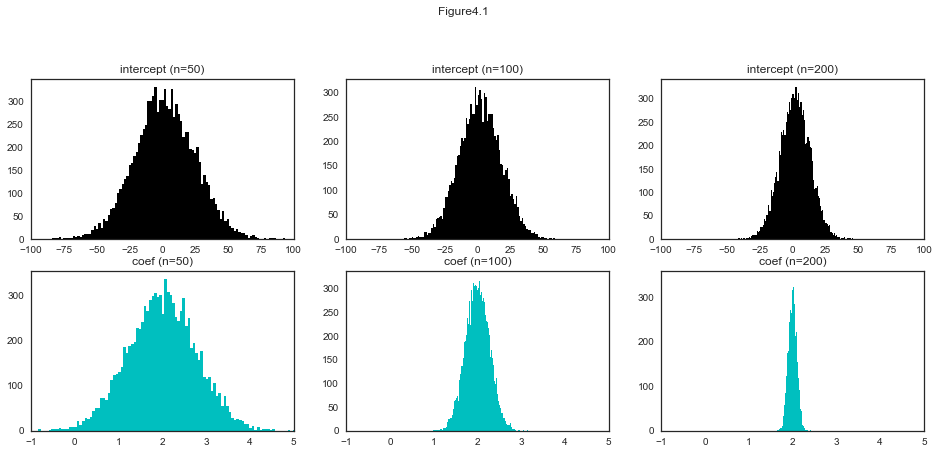

In [58]:
# Visualise    
# n=50
fig1=plt.figure(1, figsize=(16,10))
plt.subplot(331)
plt.hist(intercept_50, bins=100, color='k')
plt.title('intercept (n=50)')
plt.xlim(-100,100)

plt.subplot(334)
plt.hist(coef_50,bins=100, color='c')
plt.title('coef (n=50)')
plt.xlim(-1,5)

'''plt.subplot(337)
plt.hist(Rsquared_50,bins=100)
plt.title('Rsquared (n=50)')
plt.xlim(0,1)
'''

# n=100
plt.subplot(332)
plt.hist(intercept_100, bins=100, color='k')
plt.title('intercept (n=100)')
plt.xlim(-100,100)

plt.subplot(335)
plt.hist(coef_100,bins=100, color='c')
plt.title('coef (n=100)')
plt.xlim(-1,5)

'''plt.subplot(338)
plt.hist(Rsquared_100,bins=100)
plt.title('Rsquared (n=100)')
plt.xlim(0,1)'''


# n=200
plt.subplot(333)
plt.hist(intercept_200, bins=100, color='k')
plt.title('intercept (n=200)')
plt.xlim(-100,100)


plt.subplot(336)
plt.hist(coef_200,bins=100, color='c')
plt.title('coef (n=200)')
plt.xlim(-1,5)

'''plt.subplot(339)
plt.hist(Rsquared_200,bins=100)
plt.xlim(0,1)
plt.title('Rsquared (n=200)')
'''

plt.suptitle('Figure4.1')
plt.savefig('MonteCarloSimulation')

plt.show()


In [60]:
# Bias
print('Bias')
print('alpha(n=50) : %.4f' %np.average([x-2 for x in intercept_50]))
print('alpha(n=100): %.4f' %np.average([x-2 for x in intercept_100]))
print('alpha(n=200): %.4f' %np.average([x -2 for x in intercept_200]))
print('delta(n=50): %.5f' % np.average([x-2 for x in coef_50]))
print('delta(n=100): %.5f' % np.average([x-2 for x in coef_100]))
print('delta(n=200): %.5f' % np.average([x-2 for x in coef_200]))
print('\n')

# Variance
print('Variance')
print('alpha(n=50) : %.4f' %np.var([intercept_50]))
print('alpha(n=100): %.4f' %np.var([intercept_100]))
print('alpha(n=200): %.4f' %np.var([intercept_200]))
print('delta(n=50): %.5f' % np.var([coef_50]))
print('delta(n=100): %.6f' % np.var([coef_100]))
print('delta(n=200): %.6f' % np.var([coef_200]))
print('\n')

# MSE
print('MSE')
print('alpha(n=50) : %.4f' %np.average([(x-2)**2 for x in intercept_50]))
print('alpha(n=100): %.4f' %np.average([(x-2)**2 for x in intercept_100]))
print('alpha(n=200): %.4f' %np.average([(x-2)**2 for x in intercept_200]))
print('delta(n=50): %.5f' % np.average([(x-2)**2 for x in coef_50]))
print('delta(n=100): %.6f' % np.average([(x-2)**2 for x in coef_100]))
print('delta(n=200): %.6f' % np.average([(x-2)**2 for x in coef_200]))

Bias
alpha(n=50) : -0.1699
alpha(n=100): 0.1762
alpha(n=200): 0.0628
delta(n=50): 0.00614
delta(n=100): -0.00080
delta(n=200): -0.00068


Variance
alpha(n=50) : 521.6174
alpha(n=100): 261.2267
alpha(n=200): 129.7861
delta(n=50): 0.60269
delta(n=100): 0.077796
delta(n=200): 0.009600


MSE
alpha(n=50) : 521.6462
alpha(n=100): 261.2577
alpha(n=200): 129.7900
delta(n=50): 0.60272
delta(n=100): 0.077796
delta(n=200): 0.009600


## Problem 5
#### (a)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [38]:
cpi= pd.read_csv('CPIAUCSL.csv')
t=np.arange(1,len(cpi)+1).reshape(-1,1)
t=pd.DataFrame(t)
cpi=pd.concat([cpi,t],axis=1)
cpi['DATE'] = pd.to_datetime(cpi['DATE'],format='%Y-%m-%')
cpi.columns=['date','CPI','t']

In [39]:
ols5= LinearRegression()
ols5.fit(t,cpi['CPI'])
print('The intercept is %.3f' % ols5.intercept_)
print('The coefficient is %.4f' %ols5.coef_)

The intercept is 134.058
The coefficient is 0.3362


#### The same process using rpy2 package

In [40]:
# ! conda install rpy2 --y   # This allows switching R and Python on the same notebook

In [41]:
# loading extension
%load_ext rpy2.ipython 

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [42]:
%%R  
#magic command. Code in the same cell works as R
df=read.csv("CPIAUCSL.csv")
df['t']= 1:60
df$DATE = as.Date(df$DATE,format='%Y-%m-%d')
colnames(df)=c('date','CPI','t')
summary(lm(CPI~t,data=df))


Call:
lm(formula = CPI ~ t, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34167 -0.12952 -0.01262  0.14190  0.39262 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.341e+02  4.871e-02  2752.4   <2e-16 ***
t           3.362e-01  1.389e-03   242.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1863 on 58 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.999 
F-statistic: 5.861e+04 on 1 and 58 DF,  p-value: < 2.2e-16



#### (b)

In [43]:
cpi['pred']= ols5.predict(t)
cpi['resid']= cpi['CPI'] - cpi['pred']
cpi.head()

,date,CPI,t,pred,resid
0,1991-01-01,134.7,1,134.394044,0.305956
1,1991-02-01,134.8,2,134.730234,0.069766
2,1991-03-01,134.8,3,135.066425,-0.266425
3,1991-04-01,135.1,4,135.402616,-0.302616
4,1991-05-01,135.6,5,135.738806,-0.138806


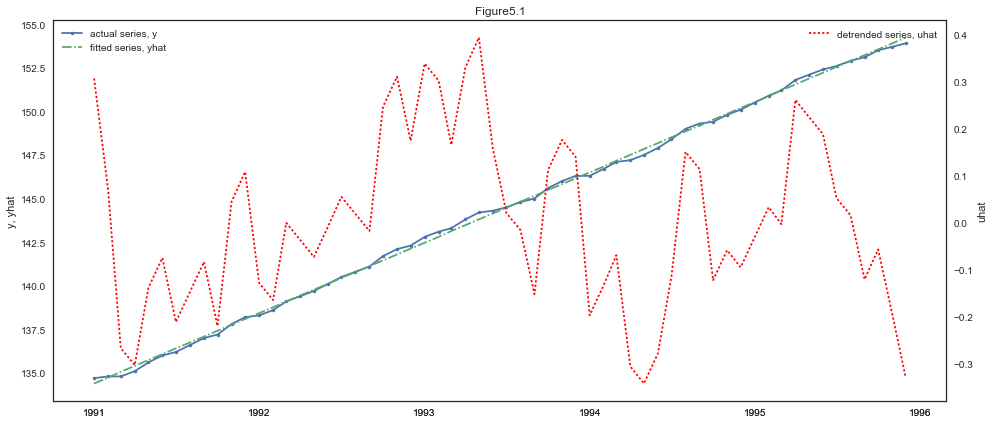

In [51]:
fig5=plt.figure(figsize=(16,7))
plt.title('Figure5.1')
ax1=plt.subplot(111)
obs=plt.plot(cpi.date,cpi.CPI,'.-',label='actual series, y')
pred=plt.plot(cpi.date,cpi.pred,'-.',label='fitted series, yhat')
plt.ylabel('y, yhat')
plt.legend()

ax2=fig5.add_subplot(111,sharex=ax1,frameon=False)
resid=ax2.plot(cpi.date,cpi.resid,':',label='detrended series, uhat',color='r')
plt.ylabel('uhat')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
plt.legend(loc='upper right')



plt.savefig('prob5b')
plt.show()

In [45]:
import statsmodels.tsa.stattools as ts
ts.adfuller(cpi['resid'],maxlag=12)

(-3.3020118608240727,
 0.014788783423333816,
 0,
 59,
 {'1%': -3.5463945337644063,
  '10%': -2.5936515282964665,
  '5%': -2.9119394093846012},
 -55.42698089111741)

In [67]:
# Using PypeR -> doesnt work...
"""import pyper
r= pyper.R()
r.assign('data', cpi)
r('ols_r=lm(CPI~t,data=cpi)')
print(r('summary(ols_r)'))"""

try({summary(ols_r)})
Error in summary(ols_r) :  オブジェクト 'ols_r' がありません 

